In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df = pd.read_csv('./input/Consumo_cerveja.csv')

In [3]:
df.columns = ['date', 'avg_temp', 'min_temp', 'max_temp', 'rain', 'is_weekend', 'beer_consumption']

In [4]:
df['avg_temp'] = df['avg_temp'].str.replace(',', '.').astype(float)
df['min_temp'] = df['min_temp'].str.replace(',', '.').astype(float)
df['max_temp'] = df['max_temp'].str.replace(',', '.').astype(float)
df['rain'] = df['rain'].str.replace(',', '.').astype(float)

In [5]:
df = df.dropna()

In [23]:
df.head()

,date,avg_temp,min_temp,max_temp,rain,is_weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [7]:
def get_correlation(predictor_fields, target_field):
    lm = LinearRegression()

    X = df[predictor_fields]
    Y = df[target_field]
    
    lm.fit(X, Y)

    print('intercept', lm.intercept_)
    print('slope', lm.coef_)
    
    print('score', lm.score(X, Y))
    
    return [lm.intercept_, lm.coef_]

In [8]:
get_correlation(['avg_temp'], 'beer_consumption')

intercept 8.5289072839855
slope [0.79488254]
score 0.3301820493324322


[8.5289072839855, array([0.79488254])]

In [9]:
get_correlation(['min_temp'], 'beer_consumption')

intercept 14.733070429821968
slope [0.61096562]
score 0.1540631083123537


[14.733070429821968, array([0.61096562])]

In [10]:
get_correlation(['max_temp'], 'beer_consumption')

intercept 7.974939379459311
slope [0.65484558]
score 0.413027909953363


[7.974939379459311, array([0.65484558])]

In [11]:
get_correlation(['rain'], 'beer_consumption')

intercept 25.75812135191357
slope [-0.06864999]
score 0.037552356536804665


[25.75812135191357, array([-0.06864999])]

In [12]:
get_correlation(['avg_temp', 'min_temp', 'max_temp', 'rain'], 'beer_consumption')

intercept 8.777863425699046
slope [ 0.04124693 -0.07488587  0.65185642 -0.05605276]
score 0.4400539694104333


[8.777863425699046,
 array([ 0.04124693, -0.07488587,  0.65185642, -0.05605276])]

(0.0, 39.116699999999994)

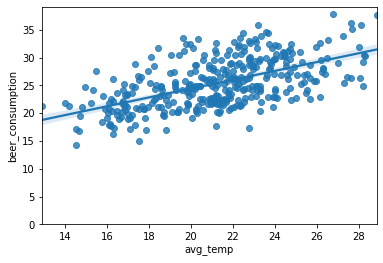

In [13]:
sns.regplot(x='avg_temp', y='beer_consumption', data=df)
plt.ylim(0,)

(0.0, 39.116699999999994)

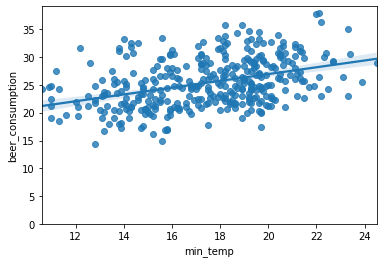

In [14]:
sns.regplot(x='min_temp', y='beer_consumption', data=df)
plt.ylim(0,)

(0.0, 39.116699999999994)

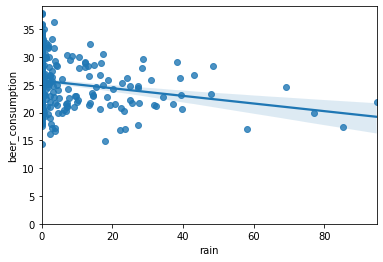

In [15]:
sns.regplot(x='rain', y='beer_consumption', data=df)
plt.ylim(0,)

<AxesSubplot:xlabel='avg_temp', ylabel='beer_consumption'>

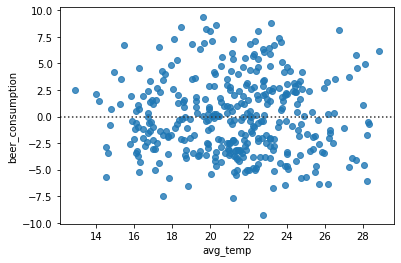

In [16]:
sns.residplot(x='avg_temp', y='beer_consumption', data=df)

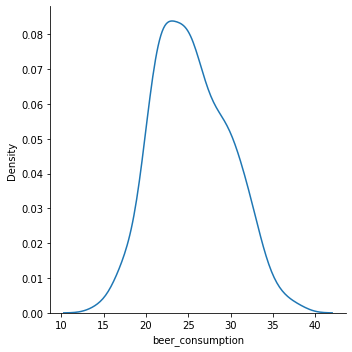

In [17]:
sns.displot(df['beer_consumption'], kind='kde')

In [18]:
f = np.polyfit(df['avg_temp'], df['beer_consumption'], 3)
print(f)
np.poly1d(f)

[-2.50894738e-04  7.89386647e-03  8.04151466e-01  7.25612435e+00]


poly1d([-2.50894738e-04,  7.89386647e-03,  8.04151466e-01,  7.25612435e+00])

In [19]:
pr = PolynomialFeatures(degree=2, include_bias=False)

In [20]:
pr.fit_transform(df[['avg_temp']])

array([[ 27.3   , 745.29  ],
       [ 27.02  , 730.0804],
       [ 24.82  , 616.0324],
       [ 23.98  , 575.0404],
       [ 23.82  , 567.3924],
       [ 23.78  , 565.4884],
       [ 24.    , 576.    ],
       [ 24.9   , 620.01  ],
       [ 28.2   , 795.24  ],
       [ 26.76  , 716.0976],
       [ 27.62  , 762.8644],
       [ 25.96  , 673.9216],
       [ 25.52  , 651.2704],
       [ 25.96  , 673.9216],
       [ 25.86  , 668.7396],
       [ 26.5   , 702.25  ],
       [ 28.86  , 832.8996],
       [ 28.26  , 798.6276],
       [ 28.22  , 796.3684],
       [ 27.68  , 766.1824],
       [ 25.32  , 641.1024],
       [ 21.74  , 472.6276],
       [ 21.04  , 442.6816],
       [ 23.12  , 534.5344],
       [ 24.4   , 595.36  ],
       [ 22.4   , 501.76  ],
       [ 23.6   , 556.96  ],
       [ 25.68  , 659.4624],
       [ 25.    , 625.    ],
       [ 22.8   , 519.84  ],
       [ 21.64  , 468.2896],
       [ 24.16  , 583.7056],
       [ 22.48  , 505.3504],
       [ 23.16  , 536.3856],
       [ 22.12

# Model evaluation

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge

### We can easily split data into train and test datasets

In [55]:
x_train, x_test, y_train, y_test = train_test_split(df[['avg_temp']], df['beer_consumption'], test_size=.3, random_state=0)

### Get a cross-validated score

In [56]:
lr = LinearRegression()
scores = cross_val_score(lr, df[['avg_temp']], df['beer_consumption'], cv=3)

In [57]:
np.mean(scores)

0.24882005025895448

### Get a cross-validated predictions

In [58]:
cross_val_predictions = cross_val_predict(lr, df[['avg_temp']], df['beer_consumption'], cv=3)

### We can see which order of the polynomial fits the model best

In [71]:
r_sq = []
orders = [1, 2, 3, 4, 5, 6, 7]

for order in orders:
    lr = LinearRegression()

    pr = PolynomialFeatures(degree=order)
    
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)

    lr.fit(x_train_pr, y_train)
    error = lr.score(x_test_pr, y_test)
    r_sq.append(error)

In [76]:
print('r_sq', r_sq)
best_r_sq = max(r_sq)
best_order = r_sq.index(best_r_sq) + 1
print('best order:', best_order)

r_sq [0.15758679820328425, 0.15762693753414958, 0.15802348412332312]
best order: 3


### To avoid overfitting we might use Ridge Regression

In [81]:
r_sq = []
alphas = [.1, 1, 10]

for alpha in alphas:
    r_r = Ridge(alpha=alpha)

    r_r.fit(x_train, y_train)
    
    error = r_r.score(x_test, y_test)
    r_sq.append(error)

print('r_sq', r_sq)
best_r_sq = max(r_sq)
best_alpha = alphas[r_sq.index(best_r_sq)]
print('best alpha:', best_alpha)

r_sq [0.15758679820328425, 0.15762693753414958, 0.15802348412332312]
best alpha: 10
